# 1: Measure Of Tendency

In [79]:
def mean(data: list[int | float]) -> float:
    """Calculates the arithmetic mean of a list of numbers."""
    if not data:
        raise ValueError("Cannot calculate mean of empty list")
    return sum(data) / len(data)

def median(data: list[int | float]) -> float:
    """Calculates the median (middle value) of a list of numbers."""
    if not data:
        raise ValueError("Cannot calculate median of empty list")
    
    # Sort a copy so we don't accidentally mess up the original list
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2

    # If odd, return the middle one
    if n % 2 == 1:
        return sorted_data[mid]
    
    # If even number of elements, average the two middle ones
    return (sorted_data[mid - 1] + sorted_data[mid]) / 2

def mode(data: list[int | float]) -> list[int | float]:
    """Calculates the mode(s). Returns a list to handle ties."""
    if not data:
        raise ValueError("Cannot calculate mode of empty list")

    # Efficient single-pass logic to find modes
    freq = {}
    max_count = 0
    modes = []

    for value in data:
        freq[value] = freq.get(value, 0) + 1
        current_count = freq[value]

        if current_count > max_count:
            max_count = current_count
            modes = [value]
        elif current_count == max_count:
            modes.append(value)
    
    return modes



In [80]:
def run_tests():
    print("--- 1. Standard Data ---")
    data = [1, 2, 2, 3, 4]
    print("Data --> ",data)
    print(f"Mean:   {mean(data)}")     # 2.4
    print(f"Median: {median(data)}")   # 2
    print(f"Mode:   {mode(data)}")     # [2]
    print("-" * 20)

    print("--- 2. Even Length List ---")
    data = [10, 20, 30, 40]
    print("Data --> ",data)
    print(f"Median: {median(data)}")   # 25.0
    print(f"Mode: {mode(data)}")   # 25.0
    print("-" * 20)

    print("--- 3. Floats & Decimals ---")
    data = [1.5, 2.5, 1.5, 5.0]
    print("Data --> ",data)
    print(f"Mean:   {mean(data)}")     # 2.625
    print(f"Mode:   {mode(data)}")     # [1.5]
    print("-" * 20)

    print("--- 4. Multimodal (Ties) ---")
    data = [5, 10, 5, 10, 20]
    print("Data --> ",data)
    print(f"Mode:   {mode(data)}")     # [5, 10]
    print("-" * 20)

    print("--- 5. Error Handling (Empty List) ---")
    try:
        mean([])
    except ValueError as e:
        print(f"Caught expected error: {e}")
    print("-" * 20)

# ==========================================
# PART 3: Execution
# ==========================================

if __name__ == "__main__":
    # This block only runs if you run this file directly.
    run_tests()

--- 1. Standard Data ---
Data -->  [1, 2, 2, 3, 4]
Mean:   2.4
Median: 2
Mode:   [2]
--------------------
--- 2. Even Length List ---
Data -->  [10, 20, 30, 40]
Median: 25.0
Mode: [10, 20, 30, 40]
--------------------
--- 3. Floats & Decimals ---
Data -->  [1.5, 2.5, 1.5, 5.0]
Mean:   2.625
Mode:   [1.5]
--------------------
--- 4. Multimodal (Ties) ---
Data -->  [5, 10, 5, 10, 20]
Mode:   [5, 10]
--------------------
--- 5. Error Handling (Empty List) ---
Caught expected error: Cannot calculate mean of empty list
--------------------


# 2. Five Number Summary -> ash

In [83]:
class FiveNumberSummary:
    def __init__(self, data: list[int | float]):
        """
        Initializes the class. 
        Sorts the data immediately so we never have to sort again.
        """
        if not data:
            raise ValueError("Cannot process an empty list.")
        
        self.sorted_data = sorted(data)
        self.n = len(self.sorted_data)
        
        # Initialize as None to track if we have run calculations yet
        self.UF = None
        self.LF = None

    def _get_median_of_subset(self, subset: list[int | float]) -> float:
        """Private helper method for median calculation."""
        count = len(subset)
        if count == 0:
            return 0.0
        
        mid = count // 2
        if count % 2 == 1:
            return subset[mid]
        return (subset[mid - 1] + subset[mid]) / 2

    def generate(self) -> dict:
        """Calculates stats, SAVES fences, and returns the summary."""
        # 1. Median
        median = self._get_median_of_subset(self.sorted_data)

        # 2. Split Data (Tukey's Method)
        mid_idx = self.n // 2
        if self.n % 2 == 0:
            lower_half = self.sorted_data[:mid_idx]
            upper_half = self.sorted_data[mid_idx:]
        else:
            lower_half = self.sorted_data[:mid_idx]
            upper_half = self.sorted_data[mid_idx + 1:]

        # 3. Quartiles & IQR
        q1 = self._get_median_of_subset(lower_half)
        q3 = self._get_median_of_subset(upper_half)
        iqr = q3 - q1

        # 4. Save Fences to self (Crucial for get_clean to work)
        self.LF = q1 - (1.5 * iqr)
        self.UF = q3 + (1.5 * iqr)

        # 5. Identify Outliers
        outliers = [x for x in self.sorted_data if x < self.LF or x > self.UF]

        return {
            "Min": self.sorted_data[0],
            "Q1": q1,
            "Median": median,
            "Q3": q3,
            "Max": self.sorted_data[-1],
            "IQR": iqr,
            "LowerFence": self.LF,
            "UpperFence": self.UF,
            "Outliers": outliers
        }

    def get_clean(self) -> list[int | float]:
        """Returns the clean data after removal of outliers."""
        # Auto-calculate if the user forgot to run generate()
        if self.LF is None or self.UF is None:
            self.generate()
            
        return [ele for ele in self.sorted_data if self.LF <= ele <= self.UF]


In [82]:
arr = [2,3,4,6,7,8,9,12,13,16,17,23,25, 27, 34, 37, 201]

In [86]:
f1 = FiveNumberSummary(arr)

In [87]:
f1.generate()

{'Min': 2,
 'Q1': 6.5,
 'Median': 13,
 'Q3': 26.0,
 'Max': 201,
 'IQR': 19.5,
 'LowerFence': -22.75,
 'UpperFence': 55.25,
 'Outliers': [201]}

In [88]:
f1.get_clean()

[2, 3, 4, 6, 7, 8, 9, 12, 13, 16, 17, 23, 25, 27, 34, 37]

In [89]:
raw_data = [10, 12, 11, 15, 12, 14, 13, 100]
f2 = FiveNumberSummary(raw_data)

In [90]:
f2.get_clean()

[10, 11, 12, 12, 13, 14, 15]

# 3. Five Number summary -> np.perecntile

In [92]:
import numpy as np

class NpxFiveNumberSummary:
    def __init__(self, data: list[int | float] | np.ndarray):
        """
        Initializes the analyzer.
        Converts input immediately to a NumPy array for C-speed performance.
        """
        # Ensure data is a numpy array (handles lists or existing arrays)
        self.data = np.array(data)
        
        if self.data.size == 0:
            raise ValueError("Cannot process an empty dataset.")

        # State variables
        self.LF = None
        self.UF = None
        self.stats = {}

    def generate(self) -> dict:
        """
        Calculates stats using NumPy optimization.
        """
        # 1. Calculate Quartiles (Linear Interpolation is Industry Standard)
        # Note: 'linear' is the default. If you strictly need Tukey's method 
        # (splitting data in half), the numbers might differ slightly, 
        # but 'linear' is what Data Scientists use.
        Q1 = np.percentile(self.data, 25)
        Q3 = np.percentile(self.data, 75)
        median = np.median(self.data)
        
        # 2. IQR and Fences
        IQR = Q3 - Q1
        self.LF = Q1 - (1.5 * IQR)
        self.UF = Q3 + (1.5 * IQR)

        # 3. Find Outliers (The "PRO" Vectorized Way)
        # This is the exact syntax you asked for:
        outliers = self.data[(self.data < self.LF) | (self.data > self.UF)]

        self.stats = {
            "Min": np.min(self.data),
            "Q1": Q1,
            "Median": median,
            "Q3": Q3,
            "Max": np.max(self.data),
            "IQR": IQR,
            "LowerFence": self.LF,
            "UpperFence": self.UF,
            "Outliers": outliers.tolist() # Convert back to list for clean printing
        }
        return self.stats

    def get_clean(self) -> np.ndarray:
        """Returns the clean data (NumPy array) without outliers."""
        if self.LF is None or self.UF is None:
            self.generate()

        # The Pro Syntax: "Masking"
        # We want data that is GREATER than LF AND LESS than UF
        return self.data[(self.data >= self.LF) & (self.data <= self.UF)]

In [93]:
raw_data = [2, 3, 4, 6, 7, 8, 9, 12, 13, 16, 17, 23, 25, 27, 34, 37, 201]
f3 = NpxFiveNumberSummary(raw_data)

In [96]:
f3.generate()

{'Min': np.int64(2),
 'Q1': np.float64(7.0),
 'Median': np.float64(13.0),
 'Q3': np.float64(25.0),
 'Max': np.int64(201),
 'IQR': np.float64(18.0),
 'LowerFence': np.float64(-20.0),
 'UpperFence': np.float64(52.0),
 'Outliers': [201]}

In [99]:
clean_data = f3.get_clean()

In [101]:
import seaborn as sns

<Axes: >

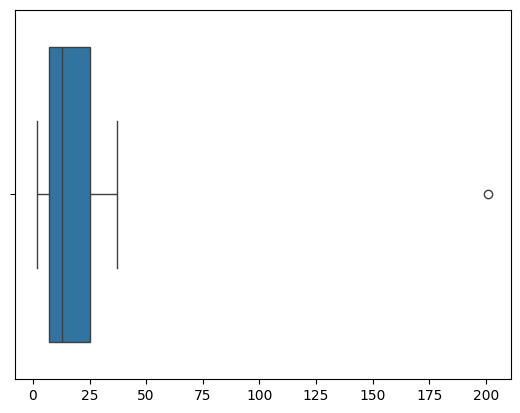

In [ ]:
sns.boxplot(x=raw_data) # with outlier

<Axes: >

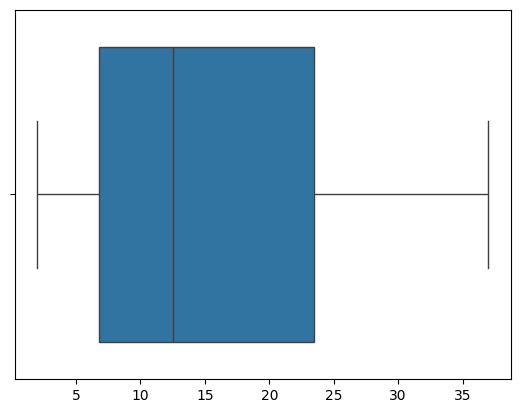

In [ ]:
sns.boxplot(x=clean_data) # Without outlier

#### Cause of above mismatch -> Tukey's method Vs Linear Interpolation

In [98]:
class FiveNumberSummary:
    def __init__(self, data: list[int | float]):
        """
        Initializes the class. 
        Sorts the data immediately.
        """
        if not data:
            raise ValueError("Cannot process an empty list.")
        
        self.sorted_data = sorted(data)
        self.n = len(self.sorted_data)
        
        self.UF = None
        self.LF = None

    def _get_percentile(self, percentile: float) -> float:
        """
        Calculates the exact percentile (0.0 to 1.0) using Linear Interpolation.
        Matches NumPy/Excel logic.
        """
        # 1. Calculate the virtual index (e.g., 4.25)
        # Formula: Index = p * (N - 1)
        k = (self.n - 1) * percentile
        
        # 2. Split into integer (4) and decimal (0.25) parts
        f = int(k)      # The floor index (e.g., 4)
        c = k - f       # The decimal part (e.g., 0.25)
        
        # 3. Handle the edge case (if index is exactly the last item)
        if f + 1 >= self.n:
            return self.sorted_data[-1]

        # 4. Interpolate between index f and f+1
        lower_value = self.sorted_data[f]
        upper_value = self.sorted_data[f + 1]
        
        return lower_value + (upper_value - lower_value) * c

    def generate(self) -> dict:
        """Calculates stats using Linear Interpolation."""
        
        # 1. Use the new helper to get Q1 (25%), Median (50%), Q3 (75%)
        # Note: 0.25 means 25%
        q1 = self._get_percentile(0.25)
        median = self._get_percentile(0.50)
        q3 = self._get_percentile(0.75)

        # 2. IQR and Fences
        iqr = q3 - q1
        self.LF = q1 - (1.5 * iqr)
        self.UF = q3 + (1.5 * iqr)

        # 3. Identify Outliers
        outliers = [x for x in self.sorted_data if x < self.LF or x > self.UF]

        return {
            "Min": self.sorted_data[0],
            "Q1": q1,
            "Median": median,
            "Q3": q3,
            "Max": self.sorted_data[-1],
            "IQR": iqr,
            "LowerFence": self.LF,
            "UpperFence": self.UF,
            "Outliers": outliers
        }

    def get_clean(self) -> list[int | float]:
        """Returns the clean data after removal of outliers."""
        if self.LF is None or self.UF is None:
            self.generate()  
        return [ele for ele in self.sorted_data if self.LF <= ele <= self.UF]

# --- Verification ---
if __name__ == "__main__":
    # Your Data
    data = [2, 3, 4, 6, 7, 8, 9, 12, 13, 16, 17, 23, 25, 27, 34, 37, 201]
    
    stats = FiveNumberSummary(data)
    report = stats.generate()
    
    print("--- Results (Matching NumPy) ---")
    print(f"Q1: {report['Q1']}")      # Should be 7.0
    print(f"Q3: {report['Q3']}")      # Should be 25.0
    print(f"IQR: {report['IQR']}")    # Should be 18.0
    print(f"Outliers: {report['Outliers']}") # Should be [201]

--- Results (Matching NumPy) ---
Q1: 7.0
Q3: 25.0
IQR: 18.0
Outliers: [201]


In [ ]:
raw_data = [2, 3, 4, 6, 7, 8, 9, 12, 13, 16, 17, 23, 25, 27, 34, 37, 201]